In [1]:
import torch

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
print("INPUTS")
print(inputs)
print("HIDDEN")

hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
print(hidden)
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)



INPUTS
tensor([[[-0.5525,  0.6355, -0.3968]],

        [[-0.6571, -1.6428,  0.9803]],

        [[-0.0421, -0.8206,  0.3133]],

        [[-1.1352,  0.3773, -0.2824]],

        [[-2.5667, -1.4303,  0.5009]]])
HIDDEN
(tensor([[[-0.1473,  0.6272,  1.0935]]]), tensor([[[ 0.0939,  1.2381, -1.3459]]]))
tensor([[[-0.0187,  0.1713, -0.2944]],

        [[-0.3521,  0.1026, -0.2971]],

        [[-0.3191,  0.0781, -0.1957]],

        [[-0.1634,  0.0941, -0.1637]],

        [[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward>)
(tensor([[[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward>), tensor([[[-0.9825,  0.4715, -0.0633]]], grad_fn=<StackBackward>))


In [10]:
import torchvision
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

In [19]:
import numpy as np

In [29]:
layer = torch.nn.Conv2d(4, 1, 2)
# Batch size 2
# Seq length 3
# 4 Channels
# 5 height
# 6 width
x = torch.from_numpy(np.random.normal(size=(2*3, 4, 5, 6))).float()
out = layer(x)

In [32]:
out

tensor([[[[ 5.1058e-04, -2.3594e-01, -5.8116e-02,  2.7001e-01,  8.2860e-01],
          [ 5.1732e-01, -6.1680e-01,  2.1360e-01, -7.6042e-01,  3.4260e-01],
          [-1.1828e+00,  6.1272e-01,  3.5242e-01,  3.8238e-01, -4.6206e-01],
          [ 4.7128e-01,  7.0977e-01,  4.4977e-01,  4.1700e-01,  8.4453e-01]]],


        [[[ 3.6647e-01,  5.1613e-01, -3.4666e-01, -8.6457e-01, -2.6813e-01],
          [ 1.0473e-01, -8.2274e-01, -2.6844e-01,  7.8981e-02, -4.1192e-01],
          [ 2.0487e-01,  9.6450e-01,  7.3805e-01,  2.8039e-01,  3.6105e-01],
          [ 1.1070e+00,  2.7984e-01,  3.0767e-01,  3.3617e-01, -5.1529e-01]]],


        [[[ 7.7514e-02, -1.9306e+00,  4.6787e-01, -6.3310e-01,  5.1092e-01],
          [-7.6354e-01,  5.9519e-01, -2.5103e-01,  5.5054e-01,  2.7288e-01],
          [ 1.1154e+00, -2.5229e-01,  7.0632e-01,  1.7200e-01, -1.0726e+00],
          [-2.3262e-01, -3.6756e-01,  1.9198e-01,  2.6146e-01,  7.3554e-01]]],


        [[[-6.3201e-01, -9.9529e-01,  1.4687e-01, -4.3467e-01, -

In [34]:
out.reshape((2, 3, 1, 4, 5))[1]

tensor([[[[-0.6320, -0.9953,  0.1469, -0.4347, -0.2679],
          [ 0.1628, -0.4129, -0.6627, -0.5403,  0.5362],
          [-0.6187,  0.5879, -0.2282, -0.0207,  0.5700],
          [ 0.3260, -0.0740,  0.3769, -1.0782,  0.6077]]],


        [[[ 0.4287,  0.1205,  0.7782,  0.5406,  0.0890],
          [-0.5310,  0.5482,  0.8237, -0.5685,  0.9360],
          [ 0.8367,  0.6339,  0.5016, -0.5621,  0.1873],
          [ 0.1564,  0.7178,  0.5180,  0.4908, -0.0451]]],


        [[[ 0.3867, -0.5417, -0.0502,  0.0549,  0.7700],
          [ 0.3770,  0.2650, -0.5171,  0.3522,  0.4247],
          [-0.7201, -0.0028,  0.7513,  0.3145,  1.4291],
          [-0.6704,  1.2456, -0.5949, -0.1462, -0.0818]]]],
       grad_fn=<SelectBackward>)

In [2]:
import os
import numpy as np
import re
import deepSM.smutils as SM
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

In [4]:
reload(SM)

<module 'deepSM.smutils' from '/home/lence/dev/deepStep/deepSM/smutils.py'>

In [5]:
SM.wavutils

<module 'deepSM.wavutils' from '/home/lence/dev/deepStep/deepSM/wavutils.py'>

In [100]:
song_names = os.listdir('data')

In [169]:
reload(SM)
sms = []
for song_name in song_names:
    sms.append(SM.SMFile(song_name))

In [170]:
sm = sms[-6]
sm.title

'Alteration'

In [523]:
x = np.arange(5)

In [525]:
44100/2

22050.0

In [524]:
x[3:10] += np.arange(7)

ValueError: operands could not be broadcast together with shapes (2,) (7,) (2,) 

In [521]:
ts = np.arange(44100/2) / 44100
f = 500
sine = np.sin(2 * np.pi * ts * f) * np.exp(-15 * ts)

In [522]:
wavfile.write('temp/ding.wav', 44100, sine)
os.system('play temp/ding.wav')

0

In [171]:
times = list(map(lambda x: x[0], sm.note_charts['Medium'].norm_notes))

In [172]:
data = sm.wavdata.copy() / 32767

In [175]:
for time in times:
    sample_point = int(time * 44100)
    data[sample_point:sample_point+44100] += sine

In [176]:
wavfile.write('temp/alteration.wav', 44100, (32767 * data / np.max(data)).astype(np.int16))

In [10]:
ts = np.array([1.001, 1.004, 1.006, 1.010, 1.011])

In [13]:
(np.round(ts, 2) * 100).astype(int)

array([100, 100, 101, 101, 101])

In [16]:
from scipy import signal

In [21]:
n = 1024 * 2**3
signal.check_NOLA('hann', n, n-512)

True

In [22]:
n

8192

In [23]:
np.arange(12).reshape((4, 3)).sum(0)

array([18, 22, 26])

In [24]:
ts = np.arange(44100) / 44100
f = 500
sine = np.sin(2 * np.pi * ts * f)

In [73]:
import essentia.standard as es
import essentia

In [302]:
n = 1024*4
f, t, Zxx = signal.stft(sine, fs=44100, nperseg=n, noverlap=n-512, window='hamming')

In [303]:
window = es.Windowing(size=n, type='hamming')
fft = es.Spectrum(size=n)
mel = es.MelBands(
    inputSize=(n//2)+1, 
    sampleRate=44100, 
    numberBands=80, 
    lowFrequencyBound=27.5, 
    highFrequencyBound=16000.0)

In [304]:
frame = next(es.FrameGenerator(essentia.array(sine), 1024*4, 512))
mel_nopad = mel(fft(window(frame)))

In [155]:
fg = es.FrameGenerator(essentia.array(sine), 1024*2, 512)
frame = next(fg)

In [161]:
frame.size

2048

In [165]:
mel_fft = fft(window(frame))
mel_pad = mel(essentia.array(np.r_[mel_fft, np.zeros(2048)]))

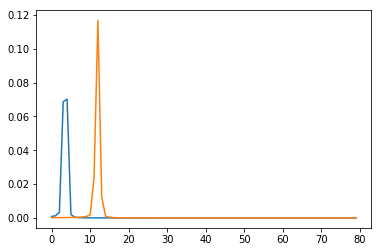

In [305]:
plt.plot(mel_pad)
plt.plot(mel_nopad)

In [166]:
mel_pad

array([8.4911735e-04, 1.2709626e-03, 3.2522876e-03, 6.8666115e-02,
       7.0200995e-02, 1.9935584e-03, 4.2674917e-04, 1.6650095e-04,
       8.0120226e-05, 4.3318934e-05, 2.5550733e-05, 1.5927795e-05,
       1.0336334e-05, 6.9248858e-06, 4.7909289e-06, 3.3834992e-06,
       2.4362066e-06, 1.7818575e-06, 1.3246582e-06, 9.9633507e-07,
       7.5850602e-07, 5.8391953e-07, 4.5347278e-07, 3.5550696e-07,
       2.8084921e-07, 2.2361289e-07, 1.7951524e-07, 1.4492623e-07,
       1.1789323e-07, 9.6392242e-08, 7.9449372e-08, 6.5695595e-08,
       5.4757972e-08, 4.5812111e-08, 3.8657905e-08, 3.2646533e-08,
       2.7785502e-08, 2.3769958e-08, 2.0431477e-08, 1.7657790e-08,
       1.5319275e-08, 1.3379708e-08, 1.1739122e-08, 1.0347654e-08,
       9.1575094e-09, 8.1583167e-09, 7.3017854e-09, 6.5611592e-09,
       5.9394925e-09, 5.3912386e-09, 4.9344364e-09, 4.5322848e-09,
       4.1882031e-09, 3.8978083e-09, 3.6465415e-09, 3.4384615e-09,
       3.2605287e-09, 3.1183554e-09, 3.0053569e-09, 2.9251632e

In [157]:
mel_nopad = mel(fft(window(frame)))

In [158]:
mel_nopad

array([6.5751135e-04, 7.3480490e-04, 7.2843395e-04, 7.3655671e-04,
       8.6413079e-04, 1.0065365e-03, 1.2121577e-03, 1.5125931e-03,
       2.0875470e-03, 3.3569080e-03, 7.2321487e-03, 5.3100161e-02,
       1.7793684e-01, 4.4215400e-02, 4.3868516e-03, 1.4797120e-03,
       7.2048540e-04, 3.9762983e-04, 2.4292141e-04, 1.5304818e-04,
       1.0470597e-04, 7.2459981e-05, 5.2144620e-05, 3.7606729e-05,
       2.7939834e-05, 2.0989250e-05, 1.6003371e-05, 1.2308072e-05,
       9.5551777e-06, 7.4338313e-06, 5.8680312e-06, 4.6575874e-06,
       3.7150783e-06, 2.9816008e-06, 2.4117051e-06, 1.9449033e-06,
       1.5841321e-06, 1.2934746e-06, 1.0607650e-06, 8.7140251e-07,
       7.1978513e-07, 5.9607436e-07, 4.9487852e-07, 4.1290835e-07,
       3.4465785e-07, 2.8887501e-07, 2.4285794e-07, 2.0479065e-07,
       1.7286438e-07, 1.4670859e-07, 1.2441791e-07, 1.0590591e-07,
       9.0488349e-08, 7.7401644e-08, 6.6570216e-08, 5.7175303e-08,
       4.9347957e-08, 4.2681407e-08, 3.7084185e-08, 3.2216199e

In [119]:
np.sum(mel(essentia.array(Zxx[:, 0])))

/usr/local/lib/python3.5/dist-packages/essentia/common.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  return numpy.array(object, dtype='f4', **kwargs)


0.040395893

In [97]:
import librosa

/usr/local/lib/python3.5/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [104]:
from librosa.core.spectrum import _spectrogram

In [296]:
n = 1024*4
f, t, Zxx = signal.stft(sine, fs=44100, nperseg=n, noverlap=n-512, window='hamming')

In [297]:
mel_op = librosa.filters.mel(44100, n, n_mels=80, fmin=27.5, fmax=16000.0)

In [298]:
mel_spec = librosa.feature.melspectrogram(sine, 44100, n_fft=n, n_mels=80, fmin=27.5, fmax=16000.0)

In [299]:
meld = np.dot(mel_op, np.abs(Zxx)[:,0])

In [300]:
mel_spec.shape

(80, 87)

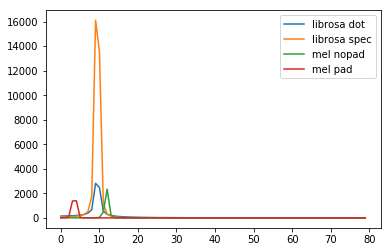

In [306]:
# plt.plot(mel_nopad)
plt.plot(meld * 250000, label='librosa dot')
plt.plot(mel_spec[:,0], label='librosa spec')
plt.plot(mel_nopad * 20000, label='mel nopad')
plt.plot(mel_pad * 20000, label='mel pad')
plt.legend()

In [226]:
n = 1024*4
f, t, Zxx = signal.stft(sine, fs=44100, nperseg=n, noverlap=n-512, window='hamming', return_onesided=True)

In [436]:
from python_speech_features.base import fbank, logfbank

In [440]:
from python_speech_features.sigproc import framesig

In [513]:
# for i in range(100):
ts = np.arange(512*87 +80) / 44100
f = 500
sine = np.sin(2 * np.pi * ts * f)
psf = fbank(sine, samplerate=44100, nfilt=80, winfunc=np.hamming, lowfreq=27.5, highfreq=16000.0, winstep=512/44100, nfft=1024, preemph=0)
psf_features, psf_energy = psf
print(psf_features.shape)

(87, 80)


(85, 80)


In [507]:
psf_features.shape

(85, 80)

In [435]:
512*87

44544

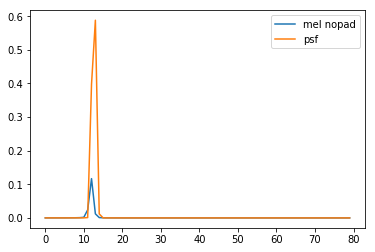

In [354]:
plt.plot(mel_nopad, label='mel nopad')
plt.plot(psf_f[0,:], label='psf')
plt.legend()

In [367]:
4096/512

8.0

In [542]:
from deepSM import wavutils
reload(wavutils)

<module 'deepSM.wavutils' from '/home/lence/dev/deepStep/deepSM/wavutils.py'>

In [540]:
ts = np.arange(44100*4) / 44100
f = 250
sine = np.sin(2 * np.pi * ts * f)

In [541]:
wavutils.play_wav(sine)

In [564]:
len(sine) / 44100

4.0

In [572]:
reload(wavutils)
wavutils.test_alignment(sine, [0, 0.5, 1, 2, 3, 3.5, 3.75])

176400
22050
22050
22050
22050
22050
22050
11025


In [568]:
154350/44100

3.5